<a href="https://colab.research.google.com/github/jasmineA20/Avocodo/blob/main/Decay_Chain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Radioactive decay chain

This exercise looks at a more advanced version of the simple
radioactive decay simulation from class.

The isotope $^{213}$Bi decays to stable $^{209}$Bi via one of two different
routes, with probabilities and half-lives thus:

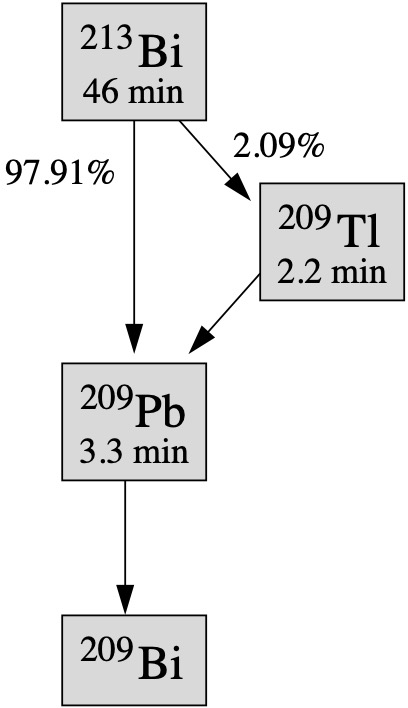

(Technically, $^{209}$Bi isn't really stable, but it has a half-life of more than $10^{19}$ years, a billion times the age of the universe, so it might as well be.)

Starting with a sample consisting of $10\,000$ atoms of $^{213}$Bi,
simulate the decay of the atoms as in class by dividing time into slices of length $\delta t=10\,$s each and on each step doing the following:

1.  For each atom of $^{209}$Pb in turn, decide at random, with the
  appropriate probability, whether it decays or not.   Count the total number that decay,
  subtract it from the number of $^{209}$Pb atoms, and add it to the number
  of $^{209}$Bi atoms.

2. Now do the same for $^{209}$Tl, except that decaying atoms are
  subtracted from the total for $^{209}$Tl and added to the total for
  $^{209}$Pb.

3.  For $^{213}$Bi the situation is more complicated: when a $^{213}$Bi atom decays you have to decide at random with the appropriate probability the route by which it decays.  Count the numbers that decay by each route
  and add and subtract accordingly.

Note that you have to work up the chain from the bottom like this, not down from the top, to avoid inadvertently making the same atom decay twice on a single step.

Keep track of the number of atoms of each of the four isotopes at all times for $20\,000$ seconds and make a single graph showing the four numbers as a function of time on the same axes.  As a check, you should ensure that the total number of atoms between the four isotypes is conserved.

Total number of atoms 10000 so total number of atoms is conserved


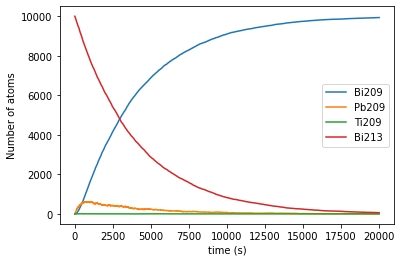

In [ ]:
from __future__ import division, print_function
from pylab import *

from random import random
random()

h = 1 

Bi209 = 0
Pb209 = 0
Ti209 = 0
Bi213 = 10000

pPb = 1 - 2**(-h/3.3/60)
pTi = 1 - 2**(-h/2.2/60)
pBi = 1 - 2**(-h/46/60)

Bi209_list = []
Pb209_list = []
Ti209_lsit = []
Bi213_list = []

t = arange(0,2e4,h)
for ti in t:
	Bi209_list.append(Bi209)
	Pb209_list.append(Pb209)
	Ti209_lsit.append(Ti209)
	Bi213_list.append(Bi213)
	
	for i in range(Pb209):
		if random()<pPb:
			Pb209-=1
			Bi209+=1
	
	for i in range(Ti209):
		if random()<pTi:
			Ti209-=1
			Pb209+=1
	
	for i in range(Bi213):
		if random()<pBi:
			Bi213 -=1
			if random()<0.9791:
				Pb209+=1
			else:
				Ti209+=1

#Checking total number of atoms between the four isotopes is conserved 
T =Pb209 +Bi209+Ti209 +Bi213
print('Total number of atoms',T,'so total number of atoms is conserved')

plot(t,Bi209_list,label='Bi209')
plot(t,Pb209_list,label='Pb209')
plot(t,Ti209_lsit,label='Ti209')
plot(t,Bi213_list,label='Bi213')
legend()
xlabel('time (s)')
ylabel('Number of atoms')
show()

# Your grade is 50/50;

* 10/10 points: Is your code commented and easy to read, with units where needed?
* 10/10 points: Did you properly calculate each of the decay probabilities?
* 10/10 points: Does your code properly updated the decay populations at each timestep?
* 15/15 points: Did your plot produce the correct results?
* 10/5 points: Is your plot labeled with units on the x-axis?